In [214]:
import requests, re, sys, os
#import urllib2
#import csv
import pandas as pd

from bs4 import BeautifulSoup
from datetime import datetime

from urllib.request import urlopen
import time
import matplotlib.pyplot as plt

from collections import Counter
import operator
import seaborn as sns
import socket



In [75]:
df=pd.DataFrame(columns=['date','site','attacker','mirror','os'])

In [12]:


sess = requests.session()


#inspect code from zoneh.org to find the the cookie information
myCookie = {
    'ZHE':'080bc96da36cdc3f9beb99043ac3dce5',
  #  'ZH':'931be96f0472188542f55e28feea8b96',
    'PHPSESSID':'o4u9300abn6o42k1jh4vqgcoa0'
}




In [76]:

count=0
for i in range(1,51):
    print('Processing Page: ',i)
    
    url2=url+str(i)
    print(url2)
    
    data = sess.get(url2, cookies=myCookie)
    data2 = data.content
    bs = BeautifulSoup(data2, 'lxml')
    table_body = bs.find('table')
    rows = table_body.find_all('tr', class_=None)[1:]
    #count=0
    
    for row in rows:
            entry = row.findAll('td')

            if len(entry) > 1:
                
                date = entry[0].text
                attacker = entry[1].text
                site = entry[7].text
                os = entry[8].text
                mirror = entry[9].find('a').get('href')
               
                df.loc[count] = [date,site,attacker,mirror,os] 
                count+=1
    
    time.sleep(5) # Be nice with the webserver
   
          

Processing Page:  1
http://zone-h.org/archive/special=1/page=1
Processing Page:  2
http://zone-h.org/archive/special=1/page=2
Processing Page:  3
http://zone-h.org/archive/special=1/page=3
Processing Page:  4
http://zone-h.org/archive/special=1/page=4
Processing Page:  5
http://zone-h.org/archive/special=1/page=5
Processing Page:  6
http://zone-h.org/archive/special=1/page=6
Processing Page:  7
http://zone-h.org/archive/special=1/page=7
Processing Page:  8
http://zone-h.org/archive/special=1/page=8
Processing Page:  9
http://zone-h.org/archive/special=1/page=9
Processing Page:  10
http://zone-h.org/archive/special=1/page=10
Processing Page:  11
http://zone-h.org/archive/special=1/page=11
Processing Page:  12
http://zone-h.org/archive/special=1/page=12
Processing Page:  13
http://zone-h.org/archive/special=1/page=13
Processing Page:  14
http://zone-h.org/archive/special=1/page=14
Processing Page:  15
http://zone-h.org/archive/special=1/page=15
Processing Page:  16
http://zone-h.org/arch

In [79]:
df['site']=df['site'].apply(lambda x: str(x).replace('\n','').replace('\t',''))

In [82]:
df.head()

,date,site,attacker,mirror,os
0,2019/04/22,sanluis.gob.mx/k.php,./Xi4u7,/mirror/id/32351245,Linux
1,2019/04/22,absensi.kemendag.go.id/bitch.html,PekapuranBerjaya,/mirror/id/32351133,F5 Big-IP
2,2019/04/22,pkk.mubakab.go.id,Akbar dravinky,/mirror/id/32351102,Linux
3,2019/04/22,www.pped.ie.ufrj.br/media/,PRdV,/mirror/id/32346511,Linux
4,2019/04/22,www.app.ie.ufrj.br/media/,PRdV,/mirror/id/32346510,Linux


### Store the dataframe locally not to download it again...

In [91]:
df.to_csv('zoneh-data/zoneh-archive.csv')

In [93]:
len(df)

1250

In [187]:
def returnDict(column):
    mydict=dict(Counter(df[column]))
    mydict=sorted(mydict.items(), key=operator.itemgetter(1))
    mydict=mydict[::-1]
    return mydict

In [188]:
mydict=returnDict('os')

In [190]:
mydict

[('Linux', 972),
 ('Win 2012', 114),
 ('Unknown', 92),
 ('Win 2008', 42),
 ('FreeBSD', 10),
 ('F5 Big-IP', 8),
 ('Win 2016', 7),
 ('Win 2003', 4),
 ('MacOSX', 1)]

In [116]:
#list_key_value = [ [k,v] for k, v in mydict.items() ]

In [180]:
labels = [x[0] for x in mydict]
sizes = [x[1] for x in mydict]
explode= (0.2,0,0,0,0,0,0,0)
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

In [181]:
pcts=[]
for el in sizes:
    pcts.append(str(100*float(el)/sum(sizes))+' %')

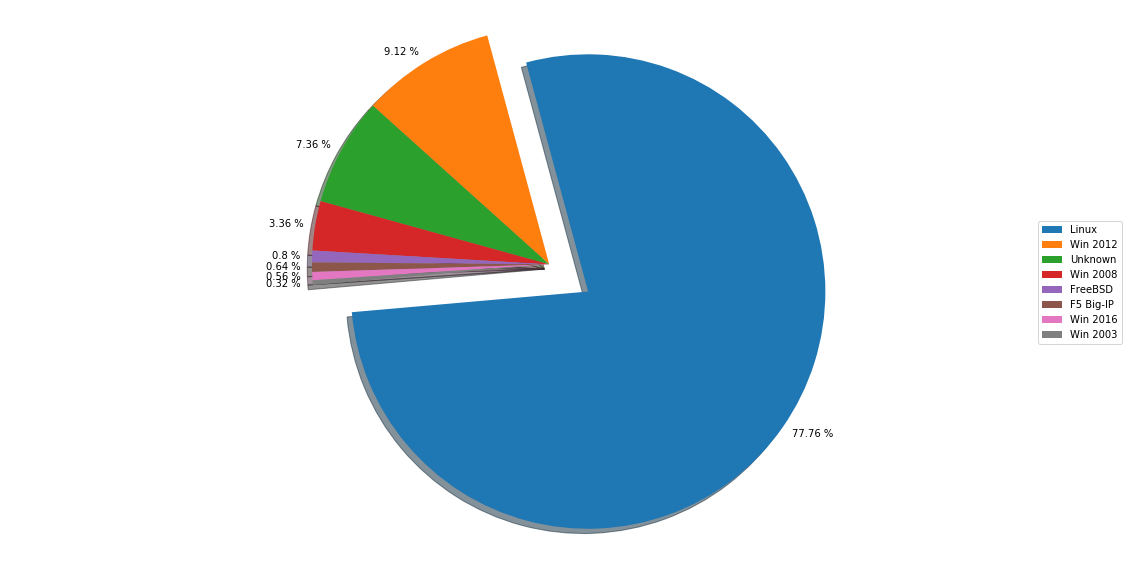

In [183]:


# Pie chart


fig1, ax1 = plt.subplots(figsize=(20, 10))
patches = ax1.pie(sizes[:-1], explode=explode, shadow=True, startangle=185,labeldistance=1.05,labels=pcts[:-1] )

#patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels,loc='right');
#plt.tight_layout()

plt.show()


### Top attackers

In [198]:
attackers=returnDict('attacker')

In [199]:
attackers=attackers[0:20]

In [200]:
attackers

[('Family Attack Cyber', 108),
 ('eRRoR 7rB', 72),
 ('Panataran', 71),
 ('aDriv4', 49),
 ('Dev19Feb', 43),
 ('ph.hitachi', 41),
 ('Akbar dravinky', 37),
 ('KingSkrupellos', 35),
 ('ifactoryx', 34),
 ('Gang Dz', 33),
 ('ErrOr SquaD', 30),
 ('Triple A', 24),
 ('Red Eye', 21),
 ('Inocent', 20),
 ('KURD ELECTRONIC TEAM', 19),
 ('4LM05TH3V!L', 17),
 ('Sons of Anarchy', 17),
 ('DARKRON', 17),
 ('Vijune15', 16),
 ('-1', 15)]

In [201]:
tmp=pd.DataFrame(attackers)

In [203]:
tmp.columns=['Attacker','Defacements']

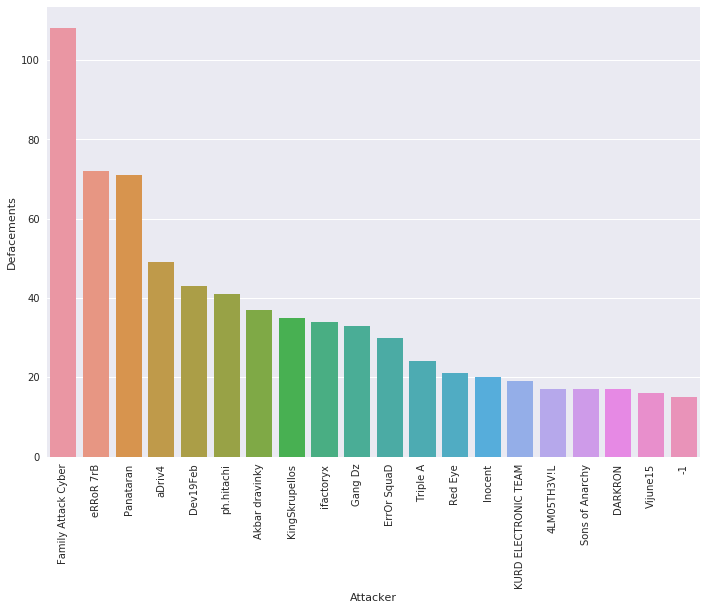

In [208]:
#import seaborn as sns
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.barplot(x="Attacker", y="Defacements", data=tmp)
ax.set_xticklabels(labels=tmp.Attacker.values,rotation=90);

#g = sns.factorplot("year", data=planets, aspect=1.5, kind="count", color="b")
#g.


# Location of defacements

In [209]:
df.head()

,date,site,attacker,mirror,os
0,2019/04/22,sanluis.gob.mx/k.php,./Xi4u7,/mirror/id/32351245,Linux
1,2019/04/22,absensi.kemendag.go.id/bitch.html,PekapuranBerjaya,/mirror/id/32351133,F5 Big-IP
2,2019/04/22,pkk.mubakab.go.id,Akbar dravinky,/mirror/id/32351102,Linux
3,2019/04/22,www.pped.ie.ufrj.br/media/,PRdV,/mirror/id/32346511,Linux
4,2019/04/22,www.app.ie.ufrj.br/media/,PRdV,/mirror/id/32346510,Linux


In [211]:
srv_list1=df['site']
srv_list2=[]
for i in srv_list1:
    #print(i)
    j=re.sub(r'^https?\:\/\/', '', i, flags=re.I)
    j=j.split("/")[0]
    #print(j)
    srv_list2.append(j)

In [ ]:
ip_list=[]
for i in srv_list2:
    try:
        ip=socket.gethostbyname(i)
        ip_list.append(ip)
        #print(str(i)+": "+str(ip))
    except:
        ip_list.append('0.0.0.0')